In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
mb=pd.read_csv('train.csv')
mb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [3]:
variance=mb.var()
zero_var_col=variance[variance==0].index
zero_var_col

Index(['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293',
       'X297', 'X330', 'X347'],
      dtype='object')

In [4]:
train_zero_var=mb.drop(zero_var_col,axis=1)

In [5]:
print (f'Original Dataset having 0 variance columns have -- "{mb.shape[0]}" -- rows and -- "{mb.shape[1]}" -- columns.')
print (f'Modified Dataset not having 0 variance columns  -- "{train_zero_var.shape[0]}" -- rows and -- "{train_zero_var.shape[1]}" -- columns.') 

Original Dataset having 0 variance columns have -- "4209" -- rows and -- "378" -- columns.
Modified Dataset not having 0 variance columns  -- "4209" -- rows and -- "366" -- columns.


In [6]:
train_zero_var.isna().sum()

ID      0
y       0
X0      0
X1      0
X2      0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 366, dtype: int64

In [7]:
print(len(train_zero_var.columns[train_zero_var.isna().any()]))

0


In [8]:
mb_test=pd.read_csv('test.csv')

In [9]:
mb_test

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8410,aj,h,as,f,d,aa,j,e,0,...,0,0,0,0,0,0,0,0,0,0
4205,8411,t,aa,ai,d,d,aa,j,y,0,...,0,1,0,0,0,0,0,0,0,0
4206,8413,y,v,as,f,d,aa,d,w,0,...,0,0,0,0,0,0,0,0,0,0
4207,8414,ak,v,as,a,d,aa,c,q,0,...,0,0,1,0,0,0,0,0,0,0


In [10]:
test_zero_var=mb_test.drop(zero_var_col,axis=1)

In [11]:
test_zero_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 365 entries, ID to X385
dtypes: int64(357), object(8)
memory usage: 11.7+ MB


In [12]:
#train_zero_var.to_csv('train_zero_var.csv',index=False)
#test_zero_var.to_csv('test_zero_var.csv',index=False)

In [13]:
train_unique=pd.DataFrame(train_zero_var.nunique(),columns=['Unique_Values'])
print(train_unique)
train_unique[train_unique.Unique_Values>2].unstack

      Unique_Values
ID             4209
y              2545
X0               47
X1               27
X2               44
...             ...
X380              2
X382              2
X383              2
X384              2
X385              2

[366 rows x 1 columns]


<bound method DataFrame.unstack of     Unique_Values
ID           4209
y            2545
X0             47
X1             27
X2             44
X3              7
X4              4
X5             29
X6             12
X8             25>

In [14]:
lab_enc = train_zero_var[['X0','X1','X2','X3','X4','X5','X6','X8']]
lab_enc

,X0,X1,X2,X3,X4,X5,X6,X8
0,k,v,at,a,d,u,j,o
1,k,t,av,e,d,y,l,o
2,az,w,n,c,d,x,j,x
3,az,t,n,f,d,x,l,e
4,az,v,n,f,d,h,d,n
...,...,...,...,...,...,...,...,...
4204,ak,s,as,c,d,aa,d,q
4205,j,o,t,d,d,aa,h,h
4206,ak,v,r,a,d,aa,g,e
4207,al,r,e,f,d,aa,l,u


In [15]:
from sklearn.preprocessing import LabelEncoder #Library for LabelEncoding

for i in lab_enc:
    le = LabelEncoder()
    le.fit(lab_enc[i])
    lab_enc[i] = le.transform(lab_enc[i])
    
lab_enc

<ipython-input-15-5a777753ad43>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab_enc[i] = le.transform(lab_enc[i])


,X0,X1,X2,X3,X4,X5,X6,X8
0,32,23,17,0,3,24,9,14
1,32,21,19,4,3,28,11,14
2,20,24,34,2,3,27,9,23
3,20,21,34,5,3,27,11,4
4,20,23,34,5,3,12,3,13
...,...,...,...,...,...,...,...,...
4204,8,20,16,2,3,0,3,16
4205,31,16,40,3,3,0,7,7
4206,8,23,38,0,3,0,6,4
4207,9,19,25,5,3,0,11,20


In [16]:
train_zero_var=train_zero_var.drop(['X0','X1','X2','X3','X4','X5','X6','X8'], axis=1)
train_zero_var = train_zero_var.join(lab_enc)
train_zero_var

,ID,y,X10,X12,X13,X14,X15,X16,X17,X18,...,X384,X385,X0,X1,X2,X3,X4,X5,X6,X8
0,0,130.81,0,0,1,0,0,0,0,1,...,0,0,32,23,17,0,3,24,9,14
1,6,88.53,0,0,0,0,0,0,0,1,...,0,0,32,21,19,4,3,28,11,14
2,7,76.26,0,0,0,0,0,0,1,0,...,0,0,20,24,34,2,3,27,9,23
3,9,80.62,0,0,0,0,0,0,0,0,...,0,0,20,21,34,5,3,27,11,4
4,13,78.02,0,0,0,0,0,0,0,0,...,0,0,20,23,34,5,3,12,3,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,0,0,0,1,0,0,0,0,...,0,0,8,20,16,2,3,0,3,16
4205,8406,108.77,0,0,0,0,0,0,0,0,...,0,0,31,16,40,3,3,0,7,7
4206,8412,109.22,0,1,1,0,0,0,0,0,...,0,0,8,23,38,0,3,0,6,4
4207,8415,87.48,0,0,0,1,0,0,0,0,...,0,0,9,19,25,5,3,0,11,20


In [17]:
test_zero_var=test_zero_var.drop(['X0','X1','X2','X3','X4','X5','X6','X8'], axis=1)
test_zero_var = test_zero_var.join(lab_enc)
test_zero_var

,ID,X10,X12,X13,X14,X15,X16,X17,X18,X19,...,X384,X385,X0,X1,X2,X3,X4,X5,X6,X8
0,1,0,0,0,0,0,0,0,0,0,...,0,0,32,23,17,0,3,24,9,14
1,2,0,0,0,0,0,0,0,0,1,...,0,0,32,21,19,4,3,28,11,14
2,3,0,0,0,1,0,0,0,0,0,...,0,0,20,24,34,2,3,27,9,23
3,4,0,0,0,0,0,0,0,0,0,...,0,0,20,21,34,5,3,27,11,4
4,5,0,0,0,1,0,0,0,0,0,...,0,0,20,23,34,5,3,12,3,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8410,0,0,0,1,0,0,0,0,0,...,0,0,8,20,16,2,3,0,3,16
4205,8411,0,0,0,0,0,0,0,0,1,...,0,0,31,16,40,3,3,0,7,7
4206,8413,0,0,0,1,0,0,0,0,0,...,0,0,8,23,38,0,3,0,6,4
4207,8414,0,0,1,1,0,0,0,0,0,...,0,0,9,19,25,5,3,0,11,20


In [18]:
train_X=train_zero_var[train_zero_var.columns[2:]]
test_X=test_zero_var[test_zero_var.columns[1:]]
print(test_X)
print(train_X)

      X10  X12  X13  X14  X15  X16  X17  X18  X19  X20  ...  X384  X385  X0  \
0       0    0    0    0    0    0    0    0    0    0  ...     0     0  32   
1       0    0    0    0    0    0    0    0    1    0  ...     0     0  32   
2       0    0    0    1    0    0    0    0    0    0  ...     0     0  20   
3       0    0    0    0    0    0    0    0    0    0  ...     0     0  20   
4       0    0    0    1    0    0    0    0    0    0  ...     0     0  20   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...  ..   
4204    0    0    0    1    0    0    0    0    0    0  ...     0     0   8   
4205    0    0    0    0    0    0    0    0    1    0  ...     0     0  31   
4206    0    0    0    1    0    0    0    0    0    0  ...     0     0   8   
4207    0    0    1    1    0    0    0    0    0    0  ...     0     0   9   
4208    0    0    0    0    0    0    0    0    1    0  ...     0     0  46   

      X1  X2  X3  X4  X5  X6  X8  
0     23  17   0

In [61]:
y=train_zero_var["y"]
y

0       130.81
1        88.53
2        76.26
3        80.62
4        78.02
         ...  
4204    107.39
4205    108.77
4206    109.22
4207     87.48
4208    110.85
Name: y, Length: 4209, dtype: float64

In [23]:
from sklearn.preprocessing import StandardScaler

stdsclr=StandardScaler()

stdsclr.fit(train_X)
train_X_std = stdsclr.transform(train_X)

test_X_std=stdsclr.fit(test_X)

train_X_std


array([[-0.11612161, -0.28490583,  4.03112887, ...,  1.29211729,
         0.75178725,  0.33944483],
       [-0.11612161, -0.28490583, -0.24806947, ...,  1.77697445,
         1.43751106,  0.33944483],
       [-0.11612161, -0.28490583, -0.24806947, ...,  1.65576016,
         0.75178725,  1.61838949],
       ...,
       [-0.11612161,  3.50993166,  4.03112887, ..., -1.61702573,
        -0.27679847, -1.08160479],
       [-0.11612161, -0.28490583, -0.24806947, ..., -1.61702573,
         1.43751106,  1.1920746 ],
       [-0.11612161, -0.28490583, -0.24806947, ..., -1.61702573,
        -0.27679847,  1.47628453]])

In [24]:
from sklearn.decomposition import PCA


In [25]:
pca=PCA()

In [145]:
pca_fit_X = pca.fit(train_X_std)
pca_fit_trans_X = pca_fit_X.transform(train_X_std)


var_per = pca_fit_X.explained_variance_ratio_
cum_var_per = pca_fit_X.explained_variance_ratio_.cumsum()
cum_var_per

array([0.06892669, 0.12581081, 0.17118538, 0.20545309, 0.23809618,
       0.26972279, 0.29834803, 0.31958554, 0.33928968, 0.35712163,
       0.3735223 , 0.38916516, 0.40379258, 0.41827593, 0.43175879,
       0.44471041, 0.45714873, 0.46887976, 0.48009026, 0.49086304,
       0.50078817, 0.51048266, 0.51990788, 0.52900656, 0.53774879,
       0.54617948, 0.55408152, 0.56171369, 0.56904909, 0.57619812,
       0.58312766, 0.58989441, 0.5964197 , 0.60283461, 0.60906149,
       0.6150533 , 0.62093402, 0.62668077, 0.63231769, 0.63785161,
       0.64335791, 0.64875853, 0.65409746, 0.65934341, 0.66444479,
       0.66947695, 0.67443561, 0.67916223, 0.68380641, 0.68837101,
       0.69276635, 0.69709472, 0.70139667, 0.70563318, 0.70983428,
       0.71398738, 0.718053  , 0.72208585, 0.72600273, 0.72988744,
       0.73370364, 0.73745645, 0.74117803, 0.74483507, 0.74842587,
       0.75197309, 0.75546691, 0.75892643, 0.76232834, 0.76566596,
       0.76896771, 0.77221462, 0.7754516 , 0.77865587, 0.78181

Text(0, 0.5, 'Variance')

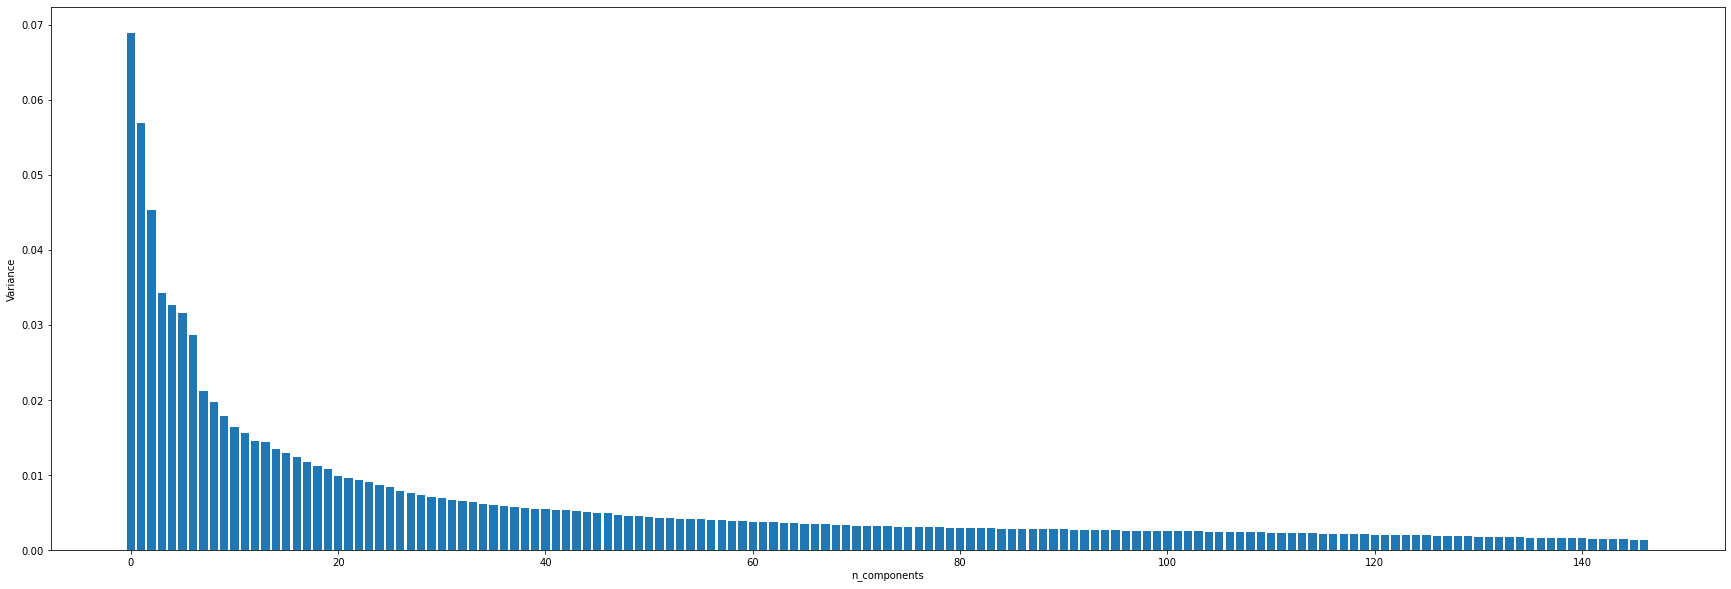

In [39]:
plt.figure(figsize=(30,10))
ind = np.arange(len(var_per)) 
plt.bar(ind,var_per)
plt.xlabel('n_components')
plt.ylabel('Variance')

Text(0, 0.5, 'Variance')

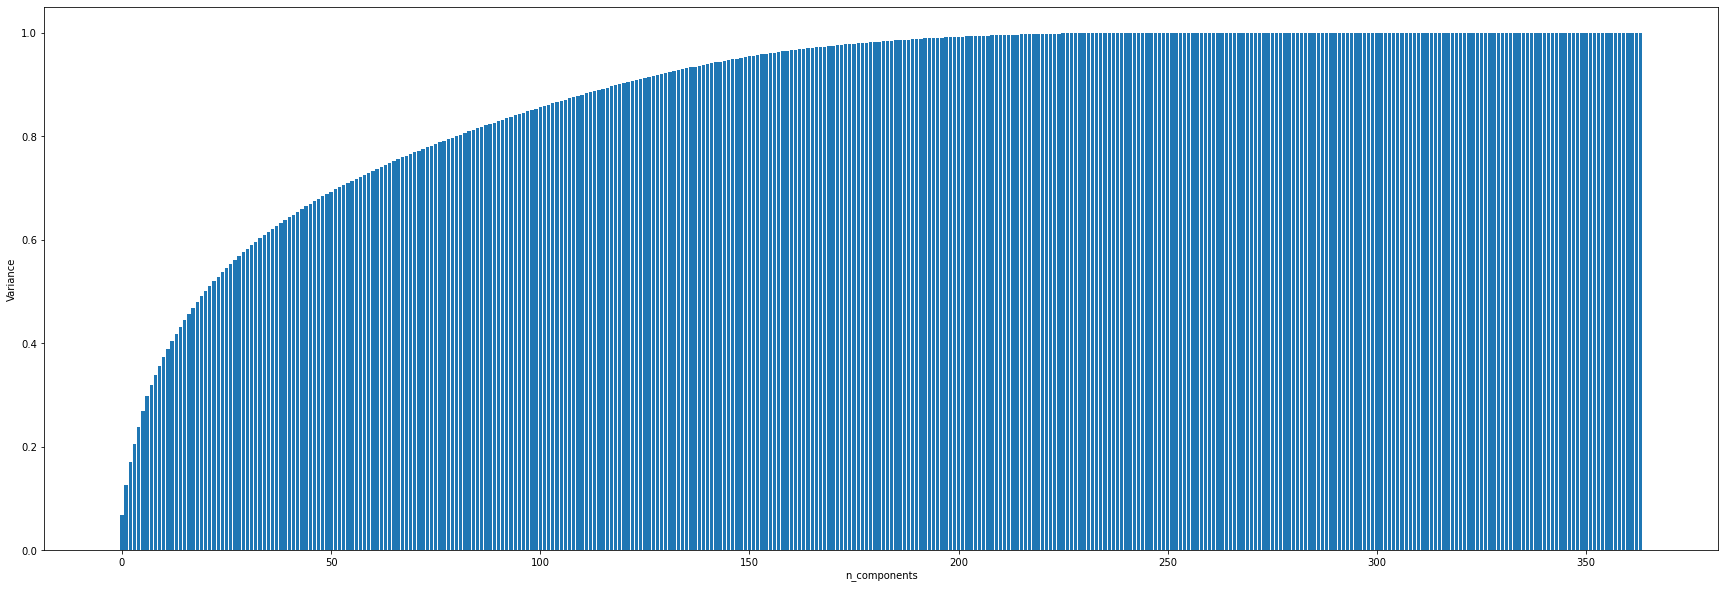

In [28]:
plt.figure(figsize=(30,10))
ind = np.arange(len(cum_var_per)) 
plt.bar(ind,cum_var_per)
plt.xlabel('n_components')
plt.ylabel('Variance')

In [155]:
len(cum_var_per[cum_var_per < 0.95])

119

In [149]:
pca = PCA(n_components = len(cum_var_per[cum_var_per < 0.9]))
X_trans = pca.fit_transform(train_X_std)
X_trans.shape

(4209, 119)

In [62]:
y

0       130.81
1        88.53
2        76.26
3        80.62
4        78.02
         ...  
4204    107.39
4205    108.77
4206    109.22
4207     87.48
4208    110.85
Name: y, Length: 4209, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x292c6b1a040>,
 'caps': [<matplotlib.lines.Line2D at 0x292cc01f2b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x292c6b1a400>],
 'medians': [<matplotlib.lines.Line2D at 0x292cc01f880>],
 'fliers': [<matplotlib.lines.Line2D at 0x292cc01fca0>],
 'means': []}

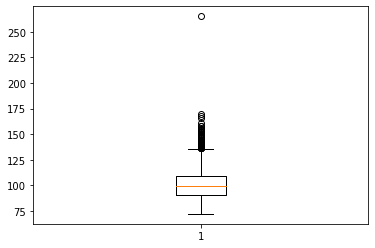

In [63]:
plt.boxplot(y)

In [67]:
median=y.median()
median

99.15

In [66]:
median=y.median()
median

120.806

In [68]:
y=np.where(y > 120.806,median, train_y)

{'whiskers': [<matplotlib.lines.Line2D at 0x292c74f8fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x292c6e6c580>,
 'boxes': [<matplotlib.lines.Line2D at 0x292c7513d90>],
 'medians': [<matplotlib.lines.Line2D at 0x292c6fc6c10>],
 'fliers': [<matplotlib.lines.Line2D at 0x292c6e53550>],
 'means': []}

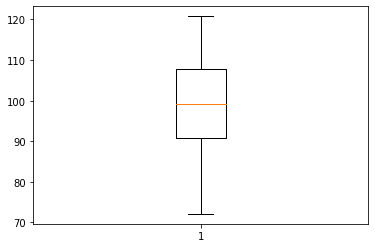

In [69]:
plt.boxplot(y)

In [70]:
y.shape

(4209,)

In [71]:
y

array([99.15, 88.53, 76.26, ..., 109.22, 87.48, 110.85], dtype=object)

In [74]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score,cross_val_predict
# Since objective is to predict continuous variable we use XGBregressor
from xgboost import XGBRegressor

In [73]:
!pip3 install xgboost

In [76]:
xgb_reg = xgb.XGBRegressor()
params={ 'learning_rate'   : [0.01,0.05,0.1,1] ,
         'max_depth'       : [2,3,5,10],
         'min_child_weight': [ 0, 1, 3],
         'n_estimators'    : [100,150,200,500],
         'gamma'           : [1e-2,1e-3,0,0.1,0.01,0.5,1],
         'colsample_bytree': [0.1,0.5,0.7,1],
         'subsample'       : [0.2,0.3,0.5,1],
         'reg_lambda'      : [0,1,10],
         'reg_alpha'       : [1e-5,1e-3,1e-1,1,1e1] 
        }

In [77]:
from sklearn.model_selection import RandomizedSearchCV
Random_Search=RandomizedSearchCV (xgb_reg,params,cv=10, scoring='r2', return_train_score=True, n_jobs=-1,verbose=1) 

In [89]:
Random_Search.fit(X_trans,y)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 27.2min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 39.7min finished


RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100,...
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.1, 0.5, 0.7, 1],
                                        'gamma': [0.01, 0.001, 0, 0.1, 0.01,
    

In [90]:
Random_Search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=5,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=1e-05, reg_lambda=10, scale_pos_weight=1, subsample=0.5,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [91]:
Random_Search.best_params_

{'subsample': 0.5,
 'reg_lambda': 10,
 'reg_alpha': 1e-05,
 'n_estimators': 500,
 'min_child_weight': 3,
 'max_depth': 5,
 'learning_rate': 0.05,
 'gamma': 0.1,
 'colsample_bytree': 1}

In [92]:
xgb_reg=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.01, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=3, missing=None, monotone_constraints='()',
             n_estimators=500, n_jobs=2, num_parallel_tree=1, random_state=0,
             reg_alpha=0.1, reg_lambda=10, scale_pos_weight=1, subsample=0.5,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [95]:
xgb_reg.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.01, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=3, missing=None, monotone_constraints='()',
             n_estimators=500, n_jobs=2, num_parallel_tree=1, random_state=0,
             reg_alpha=0.1, reg_lambda=10, scale_pos_weight=1, subsample=0.5,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [100]:
#xgb_reg.score(x_train,y_train)

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
x_train,x_test,y_train,y_test=train_test_split(X_trans,y,random_state=10,train_size=0.75)

(3156,)

In [141]:
xgbModel=XGBRegressor(max_depth=3, min_child_weight=3, reg_lambda=1000, gamma = 100)

In [142]:
xgbModel.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=100, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=3,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1000, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [143]:
xgbModel.score(x_train,y_train)

0.687746584822525

In [144]:
xgbModel.score(x_test,y_test)

0.6148092062041738